# Computational Social Science Project #3 

**Enter your Name:** Kylee Hoffman

*Semester:* Fall 2024

## 1. Introduction

### Load data 

In [1]:
#
# load libraries
# -----------
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, GridSearchCV, cross_val_predict
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import DataConversionWarning
#warnings.filterwarnings(action='ignore')


# There are a few warnings that will appear that will not affect your analysis. Run this code to ignore. 
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

# Make sure to import other libraries that will be necessary for training models!

In [2]:
#
# read in "Inspections Data 2011-2013" csv data
# -----------
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

#
# read in  "Inspections Data 2014_updated" csv data
# -----------
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014_updated.csv",  # be sure to use the "updated" data here
                                      low_memory=False)

In [3]:
# look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [4]:
# list column names
chicago_inspections_2011_to_2013.columns
#chicago_inspections_2014.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [5]:
# drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                 'Address',
                                                 'City',
                                                 'State',
                                                 'Zip',
                                                 'Latitude',
                                                 'Longitude',
                                                 'Location',
                                                 'ID',
                                                 'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                 'ACCOUNT_NUMBER',
                                                 'LEGAL_NAME',
                                                 'DOING_BUSINESS_AS_NAME',
                                                 'ADDRESS',
                                                 'CITY',
                                                 'STATE',
                                                 'ZIP_CODE',
                                                 'WARD',
                                                 'PRECINCT',
                                                 'LICENSE_CODE',
                                                 'BUSINESS_ACTIVITY_ID',
                                                 'BUSINESS_ACTIVITY',
                                                 'LICENSE_NUMBER',
                                                 'LATITUDE',
                                                 'LONGITUDE',
                                                 'pass_flag',
                                                 'fail_flag'],
                                     inplace = True)

# set index
chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [6]:
# convert the inspection date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'])  

### Visualization

Let's visualize what inspections look like over time.

<Axes: title={'center': 'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

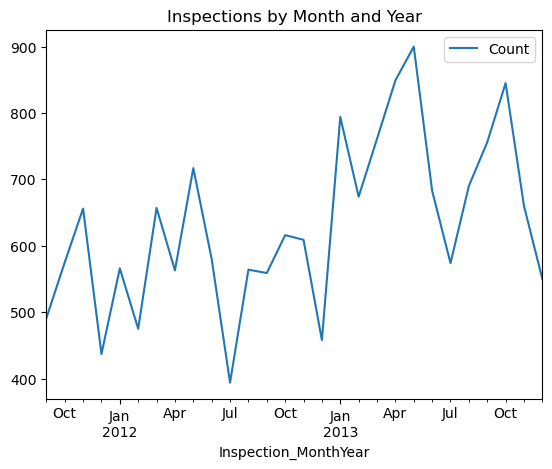

In [7]:
# visualize inspections over time
# -----------
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

Let's visualize what the distribution of results looks like.

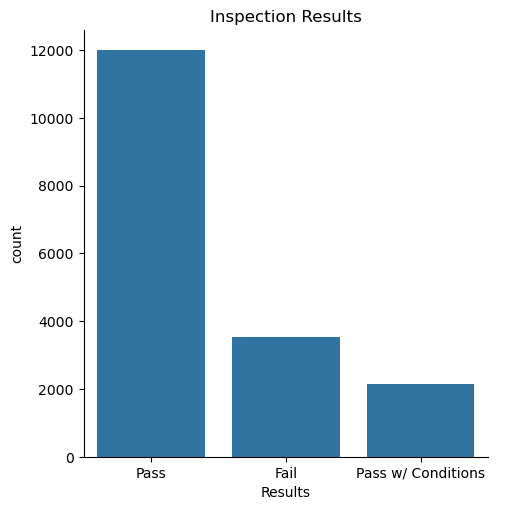

In [8]:
# view inspection results
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate results by facility type?

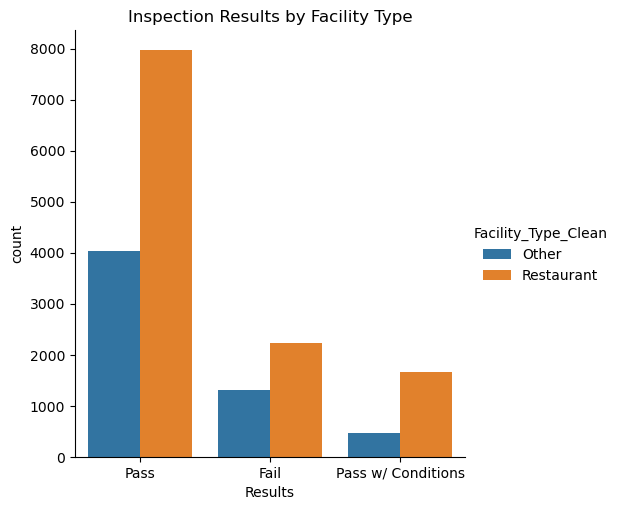

In [9]:
# view inspection results by facility type (restaurant or not)
# -----------
sns.catplot(data = chicago_inspections_2011_to_2013,
            x = "Results",
            kind = "count",
            hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show();

## 2. Data Preprocessing and Cleaning

In [10]:
# drop datetime info
# -----------
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                                                                   'minDate',
                                                                                   'maxDate',
                                                                                   'Inspection_MonthYear'],
                                                                                  axis = 1)

In [11]:
# process target 
# -----------
y = chicago_inspections_2011_to_2013['Results']

# binarize the outcome variable 
y = y.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y = lb_style.fit_transform(y)

# recode 0s and 1s so 1s are "Fail"
y = np.where(y == 1, 0 ,1)

# process features
# -----------

# create feature dataset
X = chicago_inspections_2011_to_2013.drop(columns = ['Results', 
                                                     'Facility_Type', 
                                                     'LICENSE_DESCRIPTION', 
                                                     'WARD_PRECINCT'])
# get dummies
X = pd.get_dummies(X)

In [12]:
# view feature datset
X.head()

,,criticalCount,seriousCount,minorCount,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,POLICE_DISTRICT,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound,Risk_Risk 1 (High),Risk_Risk 2 (Medium),Risk_Risk 3 (Low),Inspection_Type_Canvass,Facility_Type_Clean_Other,Facility_Type_Clean_Restaurant,APPLICATION_TYPE_C_EXPA,APPLICATION_TYPE_C_LOC,APPLICATION_TYPE_ISSUE,APPLICATION_TYPE_RENEW
Inspection_ID,DBA_Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
269961,SEVEN STAR,0,0,2,0,0,0,0,2.0,1,19.0,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0,False,False,True,True,True,False,False,False,False,True
507211,PANERA BREAD,0,0,3,0,0,0,0,2.0,1,24.0,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0,True,False,False,True,False,True,False,False,False,True
507212,LITTLE QUIAPO RESTAURANT,0,2,6,0,0,0,0,2.0,1,17.0,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0,True,False,False,True,False,True,False,False,False,True
507216,SERGIO'S TAQUERIA PIZZA INC.,0,0,6,0,0,0,0,2.0,1,17.0,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0,True,False,False,True,False,True,False,False,False,True
507219,TARGET STORE # T-2079,0,2,6,0,0,0,0,2.0,1,24.0,5.290411,0,0,1,0,0,1,0,0,0,0,0,0,0.009987,52.730000,16.266667,0.690000,9.530785,3.401567,2.126788,0,False,True,False,True,False,True,False,False,False,True


## 3. Fit Models

In [13]:
# Train/validation split
# -----------
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

In [14]:
# Normalization
# -----------
scaler = MinMaxScaler()

# scale the training and validation datasets
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_val = pd.DataFrame(scaler.fit_transform(X_val), columns = X_val.columns)

In [15]:
# initiate k-fold CV
# -----------
kf = KFold(n_splits=5, shuffle=False)

### Model 1: Logistic Regression
  
Logistic regression is used for classifying binary outcomes, making it an appropriate choice for this problem as I opted to binarize the target variables.

Pros:  
- nice and simple
- computationally efficient and easy to understand  

Cons:  
- assumes linearity
- sensitive to outliers
  
Assumptions:  
- Linearity between independent variables and the log-odds of the dependent variable  
- Independent obsevations  
- No multicollinearity between variables

In [16]:
# Logistic Regression model
# -----------
logit_reg = LogisticRegression()

# specify params to search
param_grid = {'penalty': ['l1', 'l2'],
             'C': np.arange(.1, 1, .1),
             'fit_intercept': [True, False],
             'solver': ['liblinear', 'saga']}

# search grid and fit to training data
logit_grid = GridSearchCV(logit_reg, 
                          param_grid, 
                          cv=3).fit(X_train, y_train.ravel())

# select best performing model
logit_model = logit_grid.best_estimator_

###  Model 2: XGBoost

XGBoost is an ensemble method composed of simple decision trees. It is based on boosting, so each seqential tree fixes errors made by the previous tree.  

Pros:  
- can handle nonlinearity
- can do feature importance
- reasonably fast to run  

Cons:  
- Many hyperparamters to choose from
- the logic is a bit complex to understand easily  

Assumptions:  
- Weak decision trees can combine to create a better model  
- Objective function is continuous, differentiable, and convex

In [17]:
# initialize an XGBoost classifier
# ----------------------------------
import xgboost as xgb

xgb_classifier = xgb.XGBClassifier(random_state=10)

# specify params to search
param_grid = {'min_child_weight': [1, 5, 10],
              'gamma': [0.5, 1, 1.5, 2, 5],
              'subsample': [0.6, 0.8, 1.0],
              'colsample_bytree': [0.6, 0.8, 1.0],
              'max_depth': [3, 4, 5]}

# search grid and fit to training data
xgb_grid = GridSearchCV(xgb_classifier,
                        param_grid, 
                        cv=kf).fit(X_train, y_train)

# select best performing model
xgb_model = xgb_grid.best_estimator_

### Model 3: Random Forest

Random forest is another ensemble method, but it is based on bagging rather than boosting. Many decision trees are built independent of each other on randomized subsets of the data (and features, I believe). Random forests then combine all of the predictions together.

Pros:  
- handles nonlinearity
- provides feature importance
- handles risk of overfitting fairly well  

Cons:
- Computationally expensive

Assumptions:  
- Individual trees are independent and can combine to form a better estimator
- Input data is continuous  
- Target data is discrete

In [19]:
# Initializing Random Forest classifier
# ------------------------
rf_classifier = RandomForestClassifier(random_state = 10)         

# specify params to search
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [None, 10, 20],
              'min_samples_split': [2, 5, 10],
              'min_samples_leaf': [1, 2, 4],
              'max_features': ['sqrt', 'log2']}

# search grid and fit to training data
rf_grid_search = GridSearchCV(rf_classifier,
                              param_grid, 
                              cv=kf).fit(X_train, y_train)

# select best performing model
rf_model = rf_grid_search.best_estimator_

# The grid search is taking way too long. It has only been 20 minutes, and I am very used to my data taking
# several hours to process, but at least there is a sense of satisfaction when the output is for my own research...

### Validation Metrics

Recall should be prioritized for predictive auditing. Recall measures how successfully all of the positive instances are predicted. Precision is also important, though, as it measures how often the positive predictions are correct. In the specific context of predicting health inspection results, I think that recall is most important as it prioritizes minimizing false negatives. F1 score could also be a priority as long as adjustments are made to handle the precision-recall tradeoff, but recall is still the main concern.

In [27]:
# Testing the models
# ------------------------
models = {'Logistic Regression': logit_model,
          'XGBoost': xgb_model,
          'Random Forest': rf_model}

# validation metrics
scoring = {'accuracy': make_scorer(accuracy_score),
           'recall': make_scorer(recall_score),
           'precision': make_scorer(precision_score),
           'f1': make_scorer(f1_score)}

# loop through each model, compute and print scores
for model_name, model in models.items():
    print(f"{model_name}:")
    cv_results = cross_validate(
        model, 
        X_val,
        y_val.ravel(), 
        cv=kf, 
        return_estimator=True, 
        scoring=scoring)
    
    for metric in ['test_accuracy', 'test_recall', 'test_precision', 'test_f1']:
        scores = cv_results[metric]
        print(f"{metric[5:]}: {scores.mean():.3f}")
    print("\n")

Logistic Regression:
accuracy: 0.913
recall: 0.838
precision: 0.756
f1: 0.794


XGBoost:
accuracy: 0.919
recall: 0.878
precision: 0.759
f1: 0.814


Random Forest:
accuracy: 0.917
recall: 0.871
precision: 0.755
f1: 0.809




## 4. Policy Simulation

### Interpretable Machine Learning

Investigating the models using feature importance plots.   

It looks that 'serious count' is the major contributing feature in all models, which makes sense as it measures past serious violations for each establishment. I find it interesting that humidity and windspeed contribute (marginally) in two of the models, but it makes sense as outside conditions could contribute to indoors conditions, I suppose.

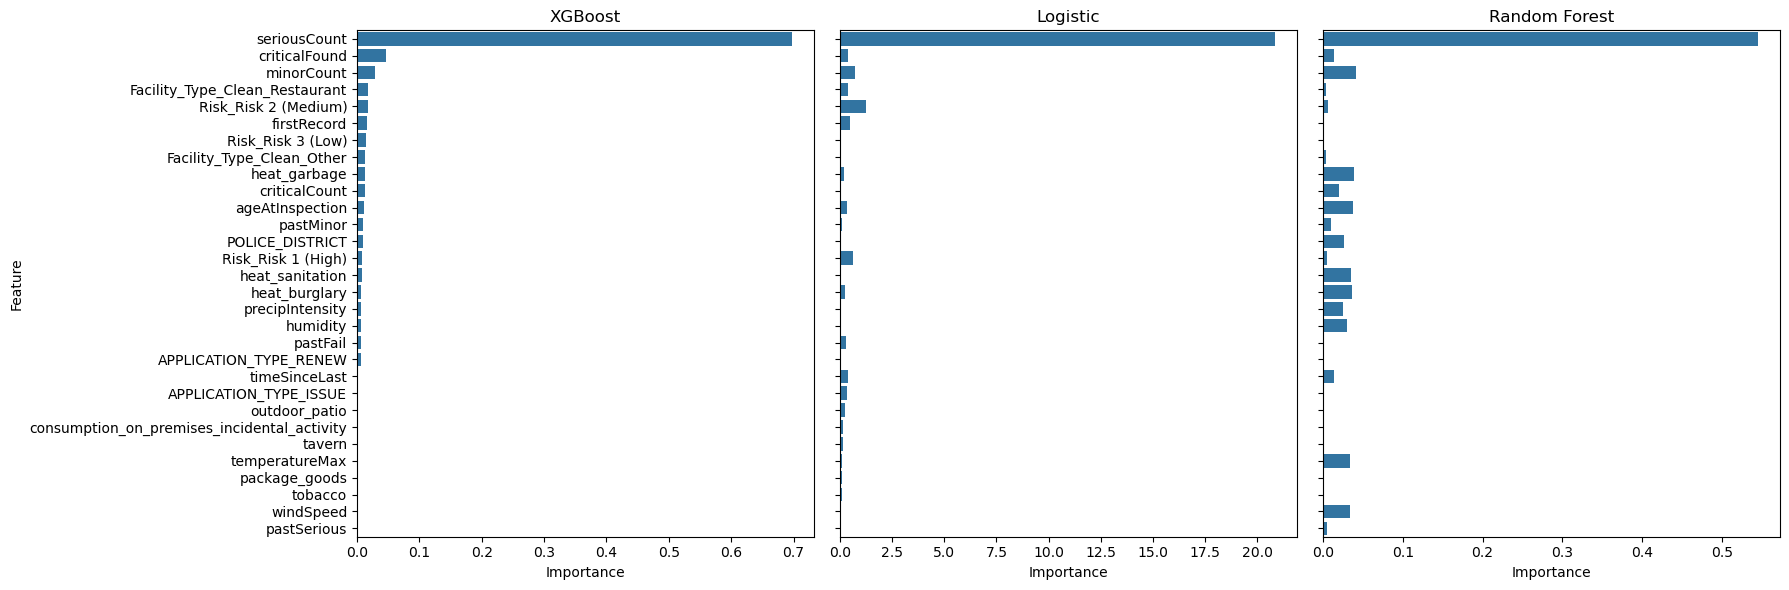

In [28]:
# Create feature importance dataframes
feat_importances_logit = pd.DataFrame({
    "Feature": X.columns,
    "Importance": np.abs(logit_model.coef_[0])})  # Use absolute values of coefficients

feat_importances_xgb = pd.DataFrame({
    "Feature": X.columns,
    "Importance": xgb_model.feature_importances_})

feat_importances_rf = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_})

# Prepare plot
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

sns.barplot(
    x="Importance",
    y="Feature",
    data=feat_importances_xgb.nlargest(20, 'Importance'),
    ax=axes[0])
axes[0].set_title("XGBoost")

sns.barplot(
    x="Importance",
    y="Feature",
    data=feat_importances_logit.nlargest(20, 'Importance'),
    ax=axes[1])
axes[1].set_title("Logistic")

sns.barplot(
    x="Importance",
    y="Feature",
    data=feat_importances_rf.nlargest(20, 'Importance'),
    ax=axes[2])
axes[2].set_title("Random Forest")
# Adjust layout
plt.tight_layout()
plt.show()

### Prioritize Audits

1. Choose best model to predict outcomes and probabilities. 
2. Order audits by their probability of detecting a "Fail" score
3. Plot the distribution of pass/fail among the first 1,000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random

In [30]:
#
# 1. A simplified version of XGBoost
# -----------

# feature importances from the best model
importances = xgb_model.feature_importances_

# sort features and select 15 most important
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances})

# new dataset with only the top 15 features. Using all of X now as the 2014 data will provide test set
X_reduced = X[feature_importance_df.sort_values(by='importance', ascending=False).head(15)['feature']]

# retrain model
xgb_model_reduced = xgb.XGBClassifier(random_state=10).fit(X_reduced, y)

In [33]:
# cross validation
xgb_cv_results = cross_validate(xgb_classifier,        # specify estimator 
                                X_reduced,             # specify features
                                y.ravel(),             # specify outcome, and use ravel
                                cv=kf,                 # specify the initiated k-fold CV
                                return_estimator=True, # return the estimators fitted at each split
                                scoring='recall')
 
print(xgb_cv_results['test_score'].mean())

0.8389899704108617


In [35]:
#
# 2. Order audits by their probability of detecting a "Fail" score
# -----------

# probabilities of failure
probabilities = xgb_model_reduced.predict_proba(X_reduced)[:, 1]

# df to link probabilities with original data
audit_results = pd.DataFrame({
    'prob_fail': probabilities,
    'result': xgb_model_reduced.predict(X_reduced)})

# sort audits
sorted_audits = audit_results.sort_values(by='prob_fail', ascending=False)

sorted_audits.head()

,prob_fail,result
10328,0.999899,1
14299,0.999878,1
4480,0.999832,1
7252,0.999821,1
6864,0.999807,1


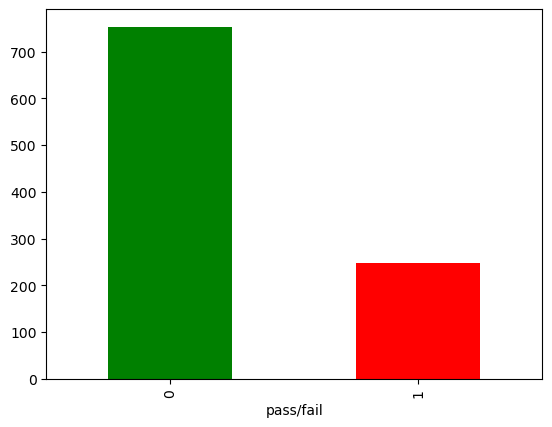

In [37]:
#
# 3. Plot the distribution of pass/fail among the first 1,000 observations in the dataset
# -----------
top_1000_audits = audit_results.head(1000)

top_1000_audits['result'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.xlabel("pass/fail")
plt.show()

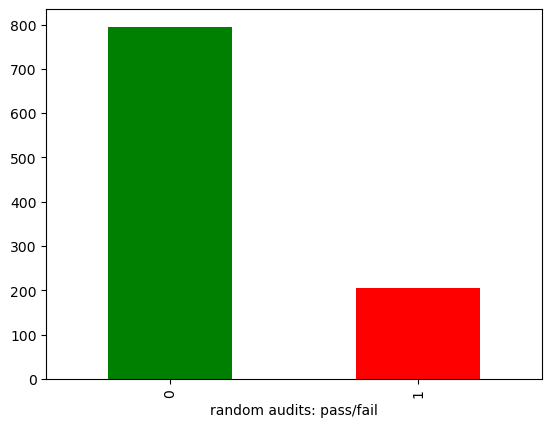

In [39]:
#
# 4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1,000 observations at random
# -----------

random_audits = audit_results.sample(n=1000)

random_audits['result'].value_counts().plot(kind='bar', color=['green', 'red'])
plt.xlabel("random audits: pass/fail")
plt.show()

### Predict on 2014 inspection data

Use your favorite model to make predictions based on the features using the "Chicago Inspection 2014_updated.csv" file. Treat this as you would a test dataset. This means you will have to format the features (including removing some features and getting dummies) and the label (binarize and recode) in the same way you did the training data. (Remember the "Results" column is your label). You will then compare your predictions with the actual.

In [41]:
# data processing
# -----------

# process target 
y_test2014 = chicago_inspections_2014['Results']

# binarize the outcome variable 
y_test2014 = y_test2014.replace({'Pass w/ Conditions': 'Pass'})
lb_style = LabelBinarizer()
y_test2014 = lb_style.fit_transform(y_test2014)

# recode 0s and 1s so 1s are "Fail"
y_test2014 = np.where(y_test2014 == 1, 0 ,1)

X_test2014 = chicago_inspections_2014.drop(columns = ['Results', 
                                                     'Facility_Type', 
                                                     'LICENSE_DESCRIPTION', 
                                                     'WARD_PRECINCT'])

# get dummies
X_test2014 = pd.get_dummies(X_test2014)

# pretty handy column filtering
X_test2014 = X_test2014[X_reduced.columns]

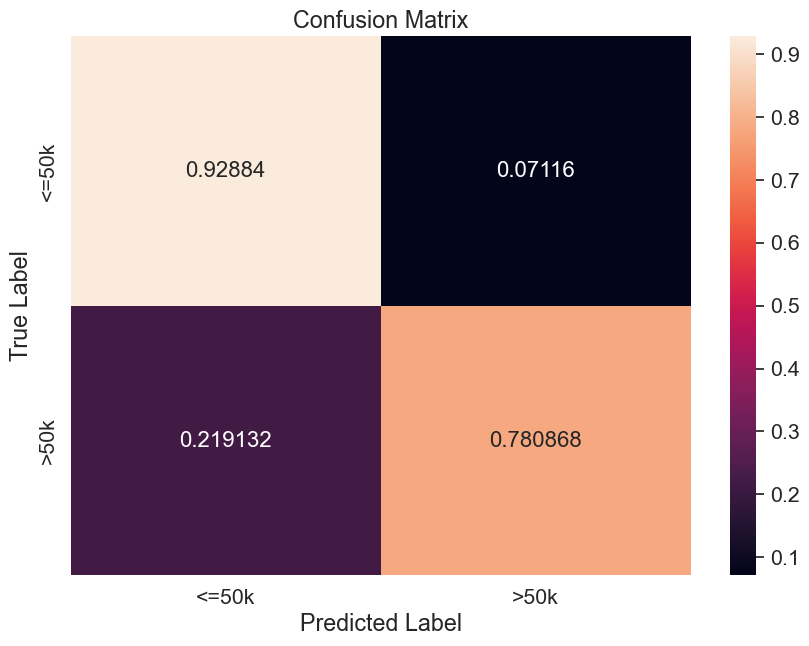

In [42]:
# predict and compare 
# -----------

y_pred2014 = xgb_model_reduced.predict(X_test2014)

# create a confusion matrix
cf_matrix = confusion_matrix(y_test2014, 
                             y_pred2014, 
                             normalize = "true")

# convert to a dataframe
df_cm = pd.DataFrame(cf_matrix, range(2), range(2))

# set figure specifications
df_cm = df_cm.rename(index=str, columns={0: "<=50k", 1: ">50k"})
df_cm.index = ["<=50k", ">50k"]
plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, 
           annot=True,
           annot_kws={"size": 16},
           fmt='g')

# plot
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [43]:
# calculate recall
# -----------

# set each object to 0 to start
TP = 0
FP = 0
TN = 0
FN = 0

# loop over each observation to assign to TP, FP, TN, and FN
for i in range(len(y_pred2014)): 
    if y_test2014[i]==y_pred2014[i]==1:
        TP += 1
    if y_pred2014[i]==0 and y_pred2014[i]!=y_test2014[i]:
        FN += 1

# calculate recall based on the formula defined above
recall = TP/(TP + FN)
print("Recall is", recall)

Recall is 0.7808676307007787


Since recall is useful for minimizing false negatives, that metric makes most sense from a policy perspective as it most ensures that restaurants who would fail do not slip through the cracks, though it may falsely penalize safe establishments. However, that is more responsible from a public health pespective. The recall score is not terrible, but definitely much lower than the score achieved when working with the training data. (I know I *probably* made a mistake up there, but it is 7pm on a Friday night and I am a *big fan* of work-life balance)

## 5. Discussion Questions

1. Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?


For social science and public policy research, the types of errors have context-dependent implications. In the case of health inspections, for example, it is much better for population health if we are most concerned with reducing false negatives in failure rates (it's better to be safe than sorry lol). Measuring accuracy alone does not differentiate between false negatives and false positives because accuracy is only concerned with how correct the model predicted in general.

2. Imagine that establishments learned about the algorithm being used to determine who gets audited and they started adjusting their behavior (and changing certain key features about themselves that were important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

I think policymakers would best address this by not fully relying on ML to determine who gets audited when public health is concerned. However, some sort of randomization being implemented in the algorithm would help, so that a dusiness checking every correct box does not automatically mean it bypasses getting flagged for an audit.